In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPool1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

In [3]:
#데이터 불러오기
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

In [4]:
#단어의 수를 맞춤
X_train = sequence.pad_sequences(X_train,maxlen=500)
X_test = sequence.pad_sequences(X_test,maxlen=500)

In [9]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))
X_train


25000
25000
25000
25000


array([[   0,    0,    0, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]])

In [8]:
#모델 설정
model = Sequential()
model.add(Embedding(5000, 100)) #단어 임베딩
model.add(Dropout(0.5)) #노드 꺼줌(50%)
model.add(Conv1D(64,5,padding = 'valid', activation= 'relu', strides=1)) 
model.add(MaxPool1D(pool_size=4)) #maxpooling -> 25%로 줄어듦
model.add(LSTM(55)) #node수 
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [9]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(X_train, y_train, batch_size=40, epochs=100, 
                    validation_split = 0.25, callbacks=[early_stopping_callback])

Epoch 1/100
469/469 [==============================] - 47s 96ms/step - loss: 0.4204 - accuracy: 0.7945 - val_loss: 0.2975 - val_accuracy: 0.8790
Epoch 2/100
469/469 [==============================] - 48s 102ms/step - loss: 0.2371 - accuracy: 0.9067 - val_loss: 0.3060 - val_accuracy: 0.8744
Epoch 3/100
469/469 [==============================] - 48s 102ms/step - loss: 0.1882 - accuracy: 0.9287 - val_loss: 0.2738 - val_accuracy: 0.8918
Epoch 4/100
469/469 [==============================] - 48s 103ms/step - loss: 0.1481 - accuracy: 0.9454 - val_loss: 0.2821 - val_accuracy: 0.8925
Epoch 5/100
469/469 [==============================] - 48s 103ms/step - loss: 0.1194 - accuracy: 0.9557 - val_loss: 0.3254 - val_accuracy: 0.8875
Epoch 6/100
469/469 [==============================] - 48s 103ms/step - loss: 0.0953 - accuracy: 0.9680 - val_loss: 0.3355 - val_accuracy: 0.8925


In [10]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

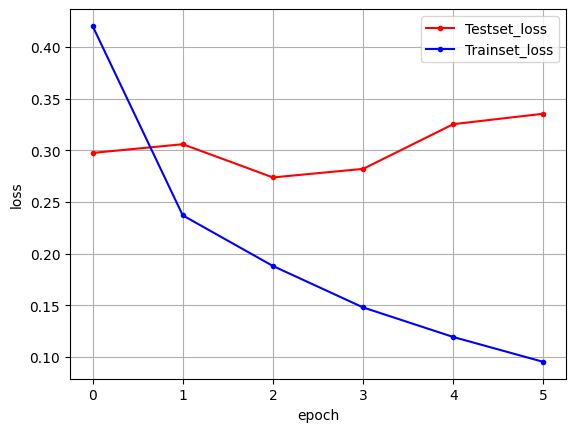

In [11]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c='red', label= 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c='blue', label= 'Trainset_loss')

plt.legend(loc= 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()